<a href="https://colab.research.google.com/github/SanKalp4/Practice-Stuffs/blob/main/HR%20Hazard%20Compensation%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df= pd.read_csv('/content/IHMStefanini_industrial_safety_and_health_database_with_accidents_description (1).csv')

In [4]:
df.head(10)

,Unnamed: 0,Data,Countries,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,01-01-2016 00:00,Country_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,02-01-2016 00:00,Country_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,06-01-2016 00:00,Country_01,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,08-01-2016 00:00,Country_01,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,10-01-2016 00:00,Country_01,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
5,5,12-01-2016 00:00,Country_02,Metals,I,III,Male,Third Party (Remote),Pressurized Systems,During the unloading operation of the ustulado...
6,6,16-01-2016 00:00,Country_02,Metals,I,III,Male,Employee,Fall prevention (same level),The collaborator reports that he was on street...
7,7,17-01-2016 00:00,Country_01,Mining,I,III,Male,Third Party,Pressed,"At approximately 04:50 p.m., when the mechanic..."
8,8,19-01-2016 00:00,Country_02,Mining,I,IV,Male,Third Party (Remote),Others,Employee was sitting in the resting area at le...
9,9,26-01-2016 00:00,Country_01,Metals,I,II,Male,Third Party,Chemical substances,At the moment the forklift operator went to ma...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident Level            425 non-null    object
 5   Potential Accident Level  425 non-null    object
 6   Genre                     425 non-null    object
 7   Employee or Third Party   425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: int64(1), object(9)
memory usage: 33.3+ KB


# EDA

In [37]:
df['Industry Sector'].unique()

array(['Mining', 'Metals', 'Others'], dtype=object)

Dropping unnamed column as insignificant, renaming data and genre column

In [9]:
df.drop(labels='Unnamed: 0',axis=1,inplace=True)
df.rename(columns={"Genre": "Gender", "Data": "Date"}, inplace=True)
df['Date']= pd.to_datetime(df['Date']) 
df.head(1)

,Date,Countries,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
0,2016-01-01,Country_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...


Third Party             189
Employee                179
Third Party (Remote)     57
Name: Employee or Third Party, dtype: int64

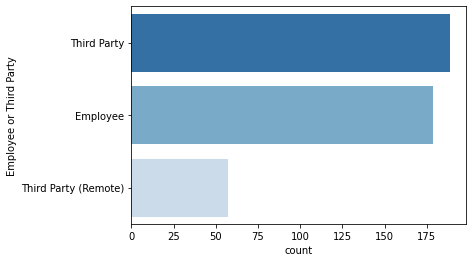

In [28]:
sns.countplot(y='Employee or Third Party', data=df, orient='h', palette='Blues_r')
acc_level = df['Employee or Third Party'].value_counts()
acc_level

Mapping data into usable stats

In [13]:
level_map = {'I': 1, 'II': 2,'III': 3 , 'IV' : 4, 'V': 5, 'VI' : 6}
df['Accident Level'] = pd.Series([level_map[x] for x in df['Accident Level']], index=df.index)

In [38]:
level_map_2 = {'I': 1, 'II': 2,'III': 3 , 'IV' : 4, 'V': 5, 'VI' : 6}
df['Potential Accident Level'] = pd.Series([level_map_2[x] for x in df['Potential Accident Level']], index=df.index)

1    316
2     40
3     31
4     30
5      8
Name: Accident Level, dtype: int64


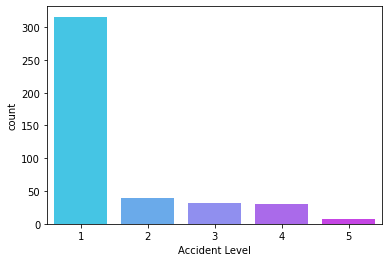

In [15]:
sns.countplot(x='Accident Level', data=df, palette='cool')
acc_level = df['Accident Level'].value_counts()
print(acc_level)

4    143
3    106
2     95
1     49
5     31
6      1
Name: Potential Accident Level, dtype: int64


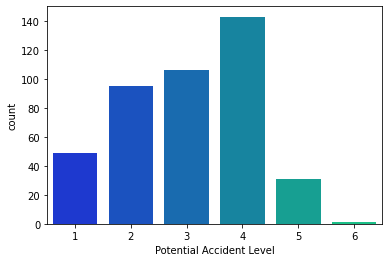

In [39]:
sns.countplot(x='Potential Accident Level', data=df, palette='winter')
acc_level2 = df['Potential Accident Level'].value_counts()
print(acc_level2)

Male      403
Female     22
Name: Gender, dtype: int64

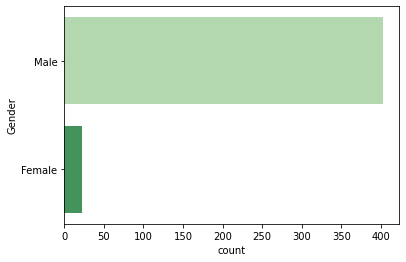

In [20]:
sns.countplot(y='Gender', data=df, orient='h', palette='Greens')
acc_level = df['Gender'].value_counts()
acc_level

Comparing accident level and potential level with different important metrics like country, industry sector and employee type to understand the underlying pattern and hidden answers

vs employment type


1    140
2     15
3     14
4     10
Name: Accident Level, dtype: int64
1    134
2     19
4     16
3     14
5      6
Name: Accident Level, dtype: int64
1    42
2     6
4     4
3     3
5     2
Name: Accident Level, dtype: int64


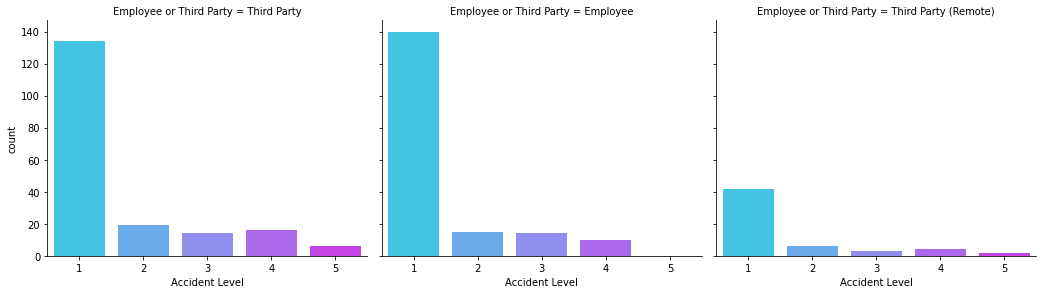

In [40]:
acc_emp = df.loc[df['Employee or Third Party'] == 'Employee']['Accident Level'].value_counts()
print(acc_emp)
acc_3rd = df.loc[df['Employee or Third Party'] == 'Third Party']['Accident Level'].value_counts()
print(acc_3rd)

acc_rmt = df.loc[df['Employee or Third Party'] == 'Third Party (Remote)']['Accident Level'].value_counts()
print(acc_rmt)

sns.catplot(x="Accident Level",col="Employee or Third Party",data=df, kind="count",height=4, aspect=1.2, palette='cool')

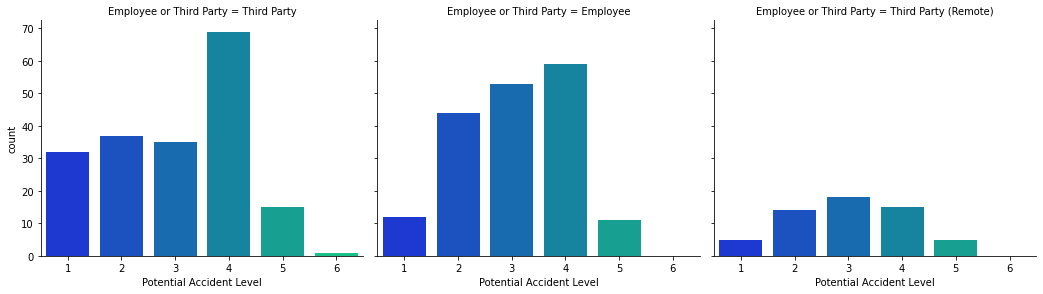

In [41]:
sns.catplot(x="Potential Accident Level",col="Employee or Third Party",data=df, kind="count",height=4, aspect=1.2, palette='winter')

vs Countries

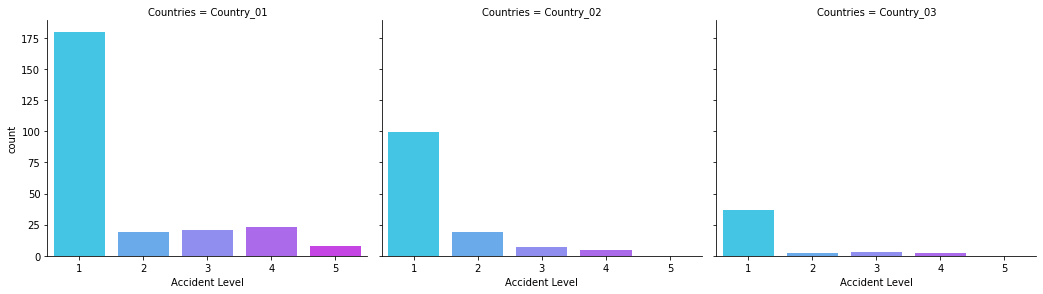

In [42]:
sns.catplot(x="Accident Level",col="Countries",data=df, kind="count",height=4, aspect=1.2, palette='cool')

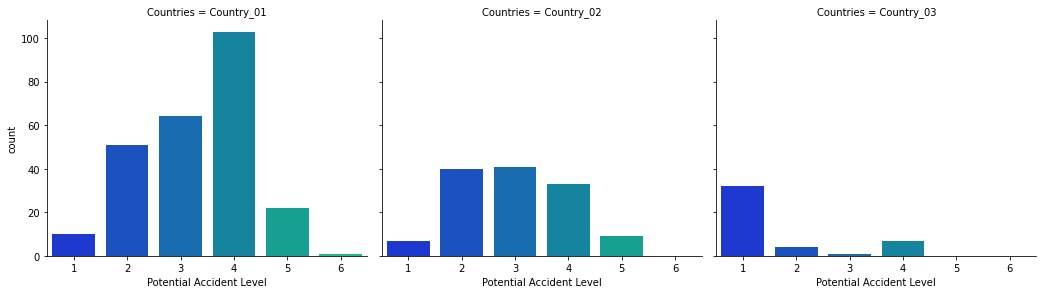

In [43]:
sns.catplot(x="Potential Accident Level",col="Countries",data=df, kind="count",height=4, aspect=1.2, palette='winter')

vs sectors

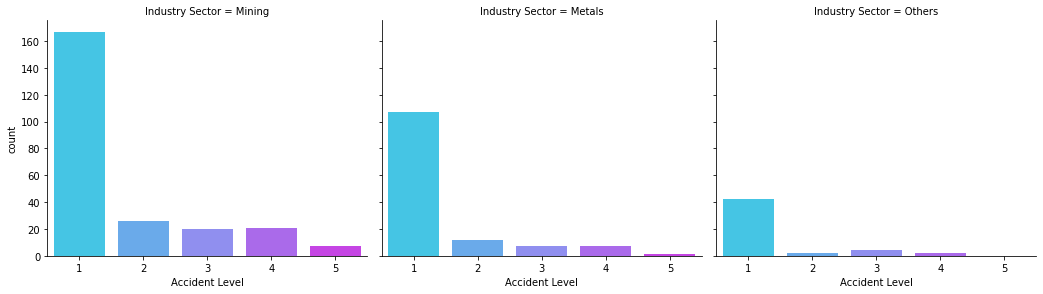

In [44]:
sns.catplot(x="Accident Level",col="Industry Sector",data=df, kind="count",height=4, aspect=1.2, palette='cool')

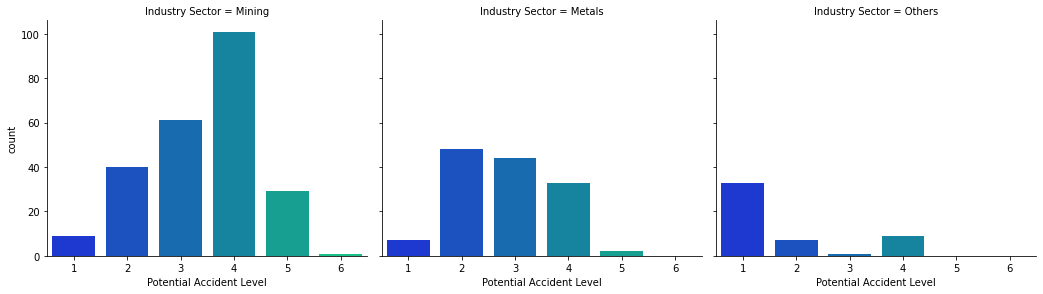

In [45]:
sns.catplot(x="Potential Accident Level",col="Industry Sector",data=df, kind="count",height=4, aspect=1.2, palette='winter')

# Decoding Data from text


In [24]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.util import ngrams
from nltk import tokenize,stem
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
def nlp_preprocesser(row):
    sentence = row.Description
    #convert all characters to lowercase
    lower_case = sentence.lower()
    tokenz = tokenize.word_tokenize(lower_case)

    #lemmatizing & stemming
    lemmatizer = stem.WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(i) for i in tokenz if i not in STOPWORDS]
    stemmer = stem.PorterStemmer()
    stems = [stemmer.stem(i) for i in lem if i not in STOPWORDS]

    #remove non-alphabetical characters like '(', '.' or '!'
    alphas = [i for i in stems if i.isalpha() and (i not in STOPWORDS)]
    return " ".join(alphas)

In [26]:
df['Description_processed'] = df.apply(nlp_preprocesser, axis=1)
df.head(5)

,Date,Countries,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Day of the Week,Description_processed
0,2016-01-01,Country_01,Mining,1,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,Friday,remov drill rod jumbo mainten supervisor proce...
1,2016-02-01,Country_02,Mining,1,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,Monday,activ sodium sulphid pump pipe uncoupl sulfid ...
2,2016-06-01,Country_01,Mining,1,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,Wednesday,milpo locat level collabor excav work pick han...
3,2016-08-01,Country_01,Mining,1,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,Monday,approxim nv personnel begin task unlock soquet...
4,2016-10-01,Country_01,Mining,4,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,Saturday,approxim circumst mechan anthoni group leader ...


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(2,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df['Description_processed'])
frequencies = sum(sparse_matrix).toarray()[0]
pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values("frequency",ascending=False).head(15)

,frequency
left hand,70
right hand,57
caus injuri,57
time accid,56
finger left,25
employe report,24
finger left hand,24
injuri describ,20
da silva,18
describ injuri,17


#Analysis
**Insights:**

* Country_01 is the country where most of the accidents happen.

> Is the company and its employee adhering to safety policies.Why the accidents are higher than other places. OR may be the operating size and size of the country is bigger than others. Eg. if someone compares accident in XYZ company in Vietnam and in India obviously data will be skewed so need a normalised data to dig into.



* Mining industry sector is also the most significant contributor to accidents.

> Obviously mining possess more risk  but even in metal sector or others if employee is not careful there is a risk

*  In Gender,Male and in employment type third party employees are higher at risk of accidents.

*  Real accident level counts are always higher than potential accident level count.
> This needs to be addressed. As for accident level 1 ,Either the accident levels are being misreported to get a compensation in which definetely the supervisor is aiding as wihout his/her signatory compensation request won't be validated in HR's office. Or may be the potential risk level count which HR is putting in individual employees' profile needs to be updated as there is discrepancy in actual accident level employee fell into and the potential hazard graded to employee profile. IF level 1 accident << level 4 , it may be reported to not be scrutinised that stringently yet get a compensation. 

*   "Others" critical risk has the highest no. of  accidents attributed to it.
> More information should be added to the dataset to help pin point the major cause of accidents.

* Most accidents occur during feb 
> Probably due to increased production pressure/fiscal year end pressure.

* Most accidents have hands , finger in description.
> Which means it was probably an accident due to not adhering to proper safety standard and trying to get things fixed instead of with specialised machine and with apropriate safety gears 

* most accidents are not in high accident level 4 and 5 
> Which probably are near fatal or fatal.

**Compensation policy**

* People being recruited for country1 , mining industry on third party payroll of male gender are potentially highest at risk and need to be high on the compensation policy . 

* Female associates in country 3 from other industry on third party remote payroll are at least risk and can have lesser compensation.

* Compensation should be formulated according to the industry type and employee profiling analysis. For example, in mining or metal industry count of potential risk of level 4 is profiled much more than actual level 4 hazard. Instead level 1 accidents have happened more.So may be level 1 hazard should be less compensated and appropriate safety and monitoring should be more




- Suppose we take the Metals sector.. and look into the Potential Accident Level 'IV', there are 6 cases when the Accident Level was indeed 'IV'. 6 cases were when the Accident Level was 'III'. 5 cases were when the Accident Level was 'II'. 16 cases were when the Accident Level was 'I'. So if we make a distribution compensation, compensation would be highest for the 6 cases when Accident Level was 'IV', and lowest for the 16 cases when Accident Level was 'I'. Likewise, we can do the same for other Industries across various Potential Accident Level. The ratio of Accident:Potential Accident is lower in case of Metals. So there was not misreported figure for level 4 accidents so the compensation could be higher in case of Metals. Similarly we can do such analysis and chalk out a compensation policy accordingly.